## Terms for Use
Solvers are responsible for complying with all terms of use for the data sources they access.  All code in this document is provided using the [CC0 1.0 Universal (CC0 1.0) Public Domain Dedication](https://creativecommons.org/publicdomain/zero/1.0/).  The examples have been tested using Python 3 but have not been tested under Python 2.  Note that data providers may have changed their APIs or data formats after this notebook was published.

### Boring Details
The code cells below set up the notebook environment and load necessary libraries

In [1]:
%matplotlib inline

In [2]:
import matplotlib
matplotlib.style.use("seaborn-dark")
import os
import json
import re
from pprint import pprint
import numpy as np
import pandas as pd
from dateutil.parser import parse # To convert strings to timestamps
import warnings
import urllib3
http = urllib3.PoolManager()
GFC_HOME = os.path.abspath("../../..")
auth_file_path = os.path.join(GFC_HOME, "src", "resources", "auth.json")
with open(os.path.join(GFC_HOME, auth_file_path), "r") as f:
    api_key_dict = json.load(f)
data_path = os.path.join(GFC_HOME, "data")

## [Quandl](https://www.quandl.com)

Quandl provides a large number of time series for financial data.  A great deal of this content is free while other content requires paid premium access.  The examples here will only address the free data.

Programmatic access to Quandl's API is available for Python, R, and Excel but requires a free API key.  See the [Quandl API documentation](https://docs.quandl.com) for details on obtaining this key and other API documentation.  To use your API key just issue a simple command

`quandl.ApiConfig.api_key = "YOURAPIKEY"`, replacing `YOURAPIKEY` with your actual key.

In the notebook below we assume that you have installed the `quandl` package.

In [18]:
QUANDL_KEY = api_key_dict["quandl"]

In [19]:
import quandl
quandl.ApiConfig.api_key = QUANDL_KEY

The basic statement to access data is `quandl.get("QUANDL_CODE")`, where `QUANDL_CODE` is Quandl's identifier for the time series and can be found by searching https://www.quandl.com/search

### Example: Gold Prices

GF Challenge 1 had IFPs related to predicting the future price of gold from the London Bullion Market Association..  In this example we will show the use of the Quandl API to get the historical price of that time series.  The Quandl identifier is `LBMA/GOLD`.  Let's retrieve and examine the tail of the data.

In [20]:
gold = quandl.get("LBMA/GOLD")
gold.tail()

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
Date,,,,,,
2019-04-02,1287.20,1290.30,984.97,988.37,1148.95,1151.59
2019-04-03,1291.85,1290.45,980.38,981.26,1148.84,1147.98
2019-04-04,1291.60,1283.15,981.87,978.66,1149.78,1144.18
2019-04-05,1288.90,1288.45,985.11,989.53,1147.51,1148.01
2019-04-08,1297.10,1300.00,993.58,996.45,1154.29,1153.49


The returned value is a pandas Data Frame object with 6 columns.  In previous IFPs the resolution time series was the column `USD (PM)`.  Let's look at a plot of this series.

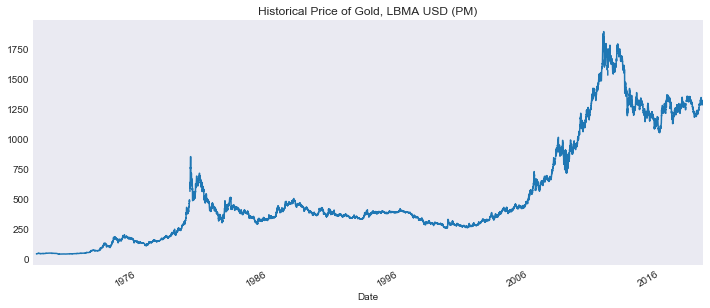

In [10]:
gold["USD (PM)"].plot(figsize=(12, 5), title="Historical Price of Gold, LBMA USD (PM)");

Now that the data is in a time series you can try any number of time series techniques such as ARIMA models or Recurrent Neural Networks.